Challenge Set 1
Topic:        Explore MTA turnstile data
Date:         07/16/2016
Name:         Katherine Pully

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
from dateutil.parser import parse
import numpy as np

%matplotlib inline


In [97]:
df = pd.read_csv('2013_movies.csv')

## Challenge 1

Plot domestic total gross over time.

In [98]:
df['ReleaseDate'] = [parse(date) for date in df.ReleaseDate]

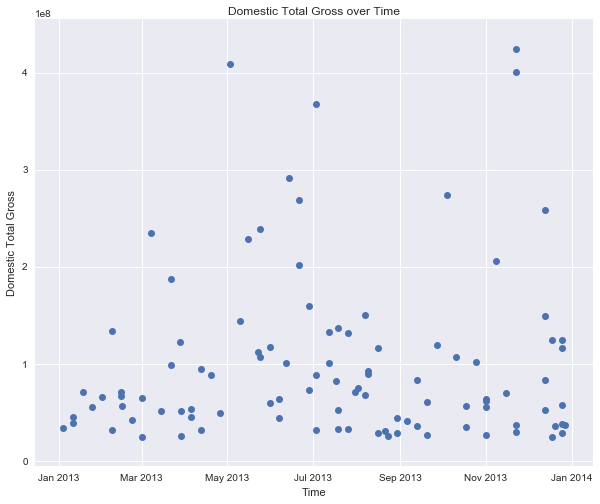

In [72]:
# Create a figure
plt.figure(figsize=(10,8))
x = df.ReleaseDate
y = df.DomesticTotalGross
#plt.scatter(df.ReleaseDate, df.DomesticTotalGross)
plt.plot_date(x, y)

# Chart title
plt.title('Domestic Total Gross over Time')

# y label
plt.ylabel('Domestic Total Gross')

# x label
plt.xlabel('Time')

# set the figure boundaries
plt.xlim([min(x) - timedelta(days=20), max(x) + timedelta(days=20)])
plt.ylim([min(y) - 30000000, max(y) + 30000000])

plt.show()

## Challenge 2

Plot runtime vs. domestic total gross.

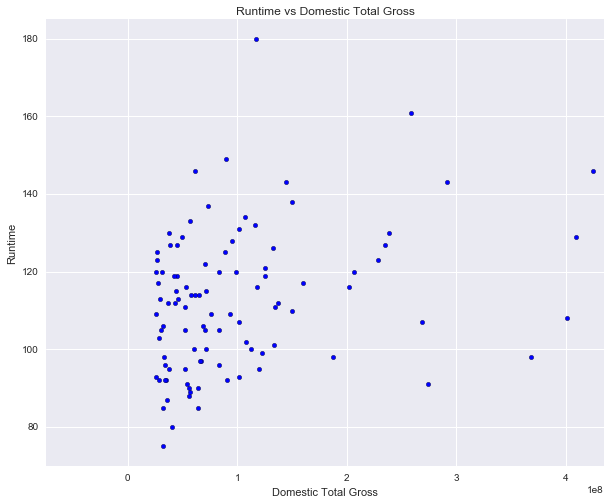

In [73]:
# Create a figure
plt.figure(figsize=(10,8))
x = df.DomesticTotalGross
y = df.Runtime
#plt.scatter(df.ReleaseDate, df.DomesticTotalGross)
plt.scatter(x, y)

# Chart title
plt.title('Runtime vs Domestic Total Gross')

# y label
plt.ylabel('Runtime')

# x label
plt.xlabel('Domestic Total Gross')

# set the figure boundaries
plt.xlim([min(x) - 100000000, max(x) + 10000000])
plt.ylim([min(y) - 5, max(y) + 5])

plt.show()

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [74]:
df_ratings = df.groupby('Rating').mean()[['Runtime', 'DomesticTotalGross']]

In [75]:
df_ratings

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [76]:
df_ratings['Rating'] = df_ratings.index
df_ratings['i'] = [1, 2, 3, 4]

In [78]:
df_ratings.set_index(df_ratings.i, inplace=True)

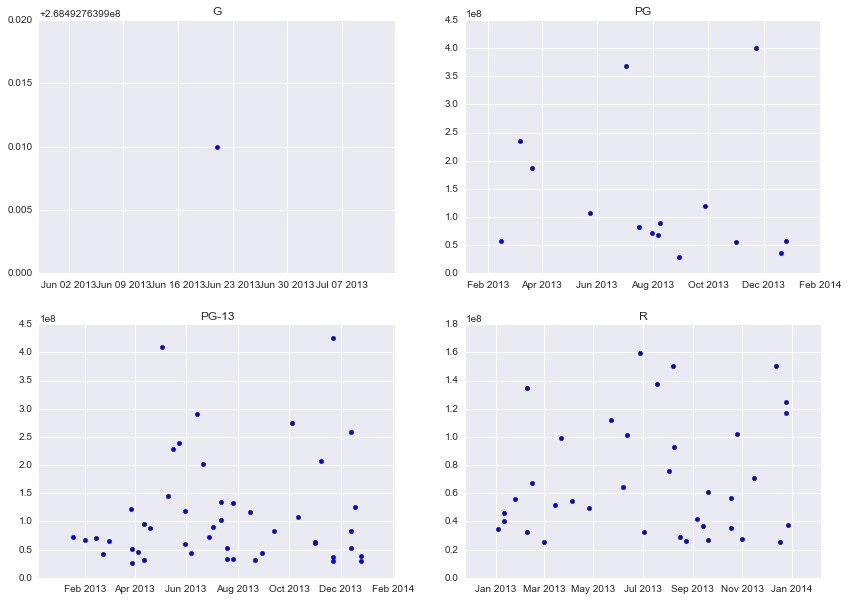

In [108]:
plt.figure(figsize=(14,10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title(df_ratings.Rating[i])
    x = np.array(df[df.Rating == df_ratings.Rating[i]].ReleaseDate)
    y = df[df.Rating == df_ratings.Rating[i]].DomesticTotalGross
    plt.scatter(x, y)

## Challenge 5

What director in your dataset has the highest gross per movie?

In [126]:
df.Director.mode()

0         James Wan
1    Malcolm D. Lee
2       Tyler Perry
dtype: object

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [180]:
from scipy import stats

In [166]:
s = df.groupby(pd.Grouper(key='ReleaseDate', freq='M'))['DomesticTotalGross'].sum()

In [182]:
err = stats.sem(s)

In [169]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

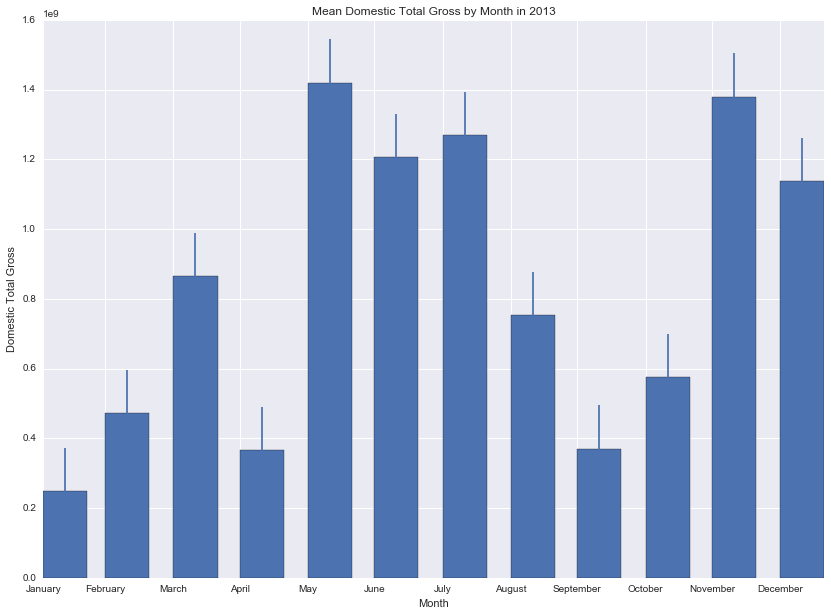

In [186]:
plt.figure(figsize=(14,10))
plt.title('Mean Domestic Total Gross by Month in 2013')
x = s.index
y = s
plt.bar(x, y, 20, yerr=err)
plt.ylabel('Domestic Total Gross')
plt.xlabel('Month')
plt.xticks(x, months)
plt.show()